# 8.프로젝트: 카메라 스티커앱 만들기 첫걸음
##### !. VScode 플랫폼을 사용하여 가상환경 Python 3.9.7버전에서 작성되었습니다.


---

### (본문)

### STEP 0: 주요 라이브러리 import

In [15]:
# 라이브러리 실행
import os
import cv2 # 이미지를 처리를 위함.#pip install opencv-python
import matplotlib.pyplot as plt # 이미지를 출력하기 위함. 
import numpy as np

#dlib는 python 3.7이상 버전에서 cmake와 같이 사용해야함.
# 방법 1: 그냥 설치
# 방법 1-1.pip install cmake
# 방법 1-2 pip install dlib
# 방법 2: 방법 1번이 안될 경우 (macOS vscode 기준)
# 방법 2-1. vscode에서 c++ cmake 지원 프로그램 설치
# 방법 2-2. pip install cmake
# 방법 2-3. pip install dlib
import dlib


#### 이미지 사진 불러오기

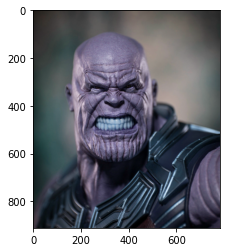

In [2]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()

#### 이미지 보정  
open cv는 RGB가 아닌 BGR순으로 출력하여 기존 이미지와 색이다름. 이로인해 RGB로 바꿔주는 보정처리를 해줘야함.

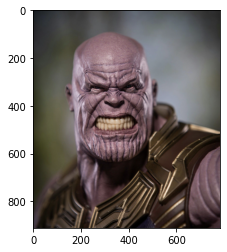

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

### STEP 1: 스티커 구하기 or 만들기

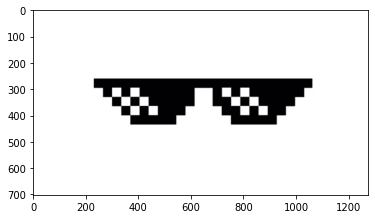

In [4]:
sticker1_path = os.getenv("HOME") + "/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png"
stick_bgr = cv2.imread(sticker1_path)    # OpenCV로 이미지를 불러오기
stick_show = stick_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(stick_bgr)
plt.show()

### STEP 2: 얼굴 검출 & 랜드마크 검출 하기 

#### 얼굴 검출하기
dlib의 face detector는 HOG와 SVM을 사용하여 얼굴을 찾아냄

In [5]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(91, 143) (553, 605)]]


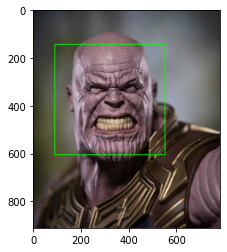

In [6]:
# 찾은 얼굴의 영역을 박스로 표시

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### STEP 3: 스티커 적용 위치 확인하기 

In [7]:
# 파이썬에서 직접 Dlib ibug 300W 데이터 셋을 다운로드하여 사용
# pip install wget
import wget

site_url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
file_name = wget.download(site_url)
print(file_name)
print("dat설치완료")

shape_predictor_68_face_landmarks.dat (1).bz2
dat설치완료


#### Face Landmark  
face landmark는 박스 형태로 검출된 얼굴 이미지를 이용한다. Dlib은 ibug 300w 데이터셋을 사용하였고 이목구비의 위치를 68개의 랜드마크로 표현한다.


![landmar](Dlib_landmark.png)

In [12]:
model_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


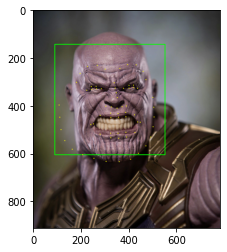

In [14]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [16]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[28]) # 미간 index : 28
    x = landmark[28][0]
    y = landmark[28][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(344, 326)
(x,y) : (344,95)
(w,h) : (463,463)


### STEP 4: 스티커 적용하기 

(463, 463, 3)


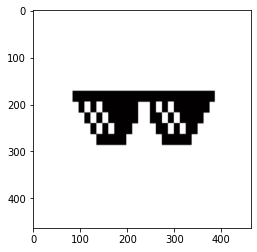

In [17]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [18]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (113,95)


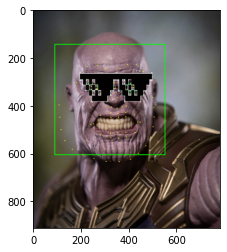

In [19]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

스티커 위치가 적당한 것을 확인.  
bounding box와 landmark를 제거

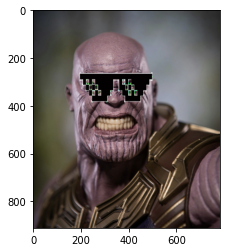

In [20]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### STEP 5: 문제점 찾아보기 

---

#### 스티커 투명도 조절해보기  

타노스의 얼굴형태가 평범한 편은 아니다 보니 선글라스가 제대로 씌워진 것 같지 않은 느낌.
타노스의 눈에 형태에 맞게 들어간 것인지 확인하기 위해 선글라스에 투명도를 높임.

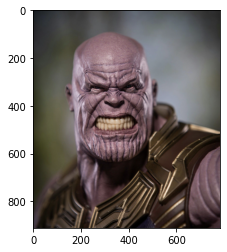

In [5]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

rectangles[[(91, 143) (553, 605)]]


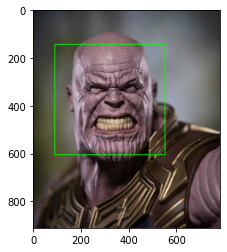

In [6]:
# detector 선언

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
# 찾은 얼굴의 영역을 박스로 표시

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


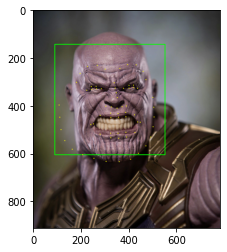

(344, 326)
(x,y) : (344,95)
(w,h) : (463,463)


In [7]:
model_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[28]) # 미간 index : 28
    x = landmark[28][0]
    y = landmark[28][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(463, 463, 3)


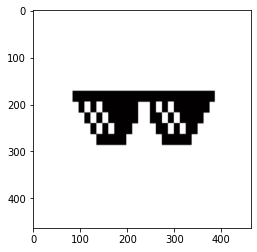

In [8]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

(x,y) : (113,95)


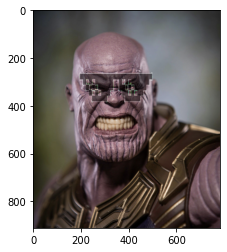

In [9]:
refined_x = x - w // 2
refined_y = y
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# if refined_y < 0:
#     img_sticker = img_sticker[-refined_y:, :]
#     refined_y = 0

# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 스티커 회전시키기

선글라스가 눈에 형태에 얼추맞게 들어갔음에도 멋지 살지 않음.  
선글라스에 멋은 삐딱하게 쓰는 것이니 선글라스를 회전시킴.

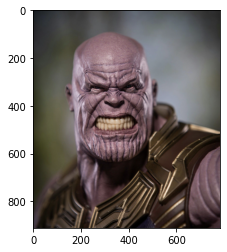

In [10]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

rectangles[[(91, 143) (553, 605)]]


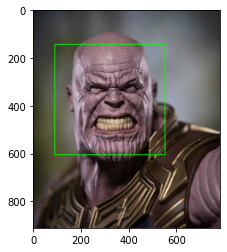

In [11]:
# 찾은 얼굴의 영역을 박스로 표시

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

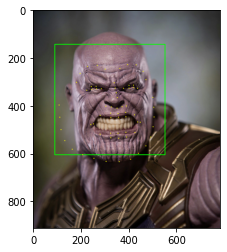

In [12]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(353, 366)
(x,y) : (353,135)
(w,h) : (463,463)


(463, 463, 3)


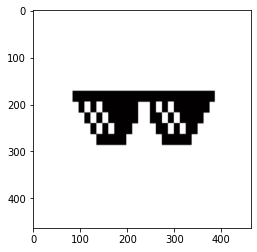

In [17]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [18]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (122,135)


In [19]:
landmark = list_landmarks[0]
v1 = np.array([0, 1])
v2 = np.array([abs(landmark[33][0] - landmark[27][0]), abs(landmark[33][1] - landmark[27][1])])
unit_vector_1 = v1 / np.linalg.norm(v1)
unit_vector_2 = v2 / np.linalg.norm(v2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)

<function matplotlib.pyplot.show(close=None, block=None)>

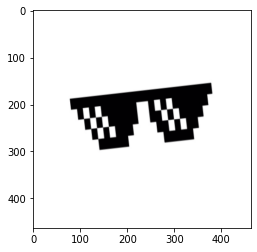

In [20]:
import math

height, width, channel = img_sticker.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), math.degrees(angle), 1)
img_dsize = cv2.warpAffine(img_sticker, matrix, (width, height), borderValue=(255, 255, 255))

plt.imshow(img_dsize)
plt.show

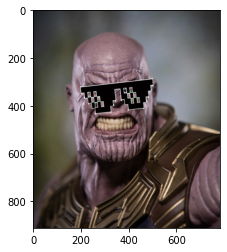

In [21]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_dsize==255,sticker_area,img_dsize).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 스티커 색깔 변경해보기

선글라스를 회전시키니 바보가 되어버림.  
선글라스에 색깔을 넣어 강렬하게 만들어봄.

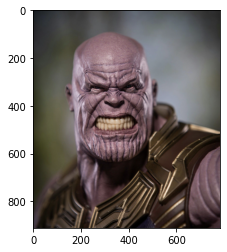

In [22]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/image_2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

rectangles[[(91, 143) (553, 605)]]


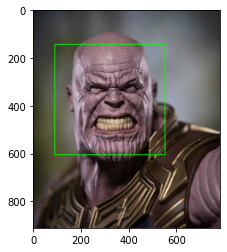

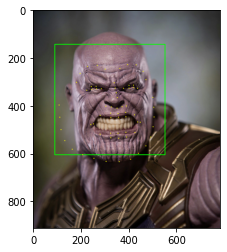

In [23]:
# 찾은 얼굴의 영역을 박스로 표시

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [24]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[28]) # 미간 index: 28
    x = landmark[28][0]
    y = landmark[28][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(344, 326)
(x,y) : (344,95)
(w,h) : (463,463)


(463, 463, 3)


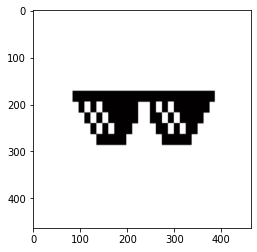

In [25]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [26]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (113,95)


<function matplotlib.pyplot.show(close=None, block=None)>

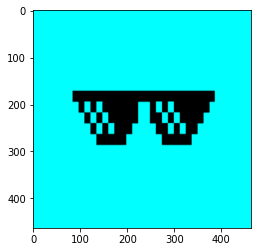

In [39]:
#substract 기능을 사용하여 배경색을 변경해봄
img_dst = cv2.subtract(img_sticker_rgb, 300)
plt.imshow(img_dst)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

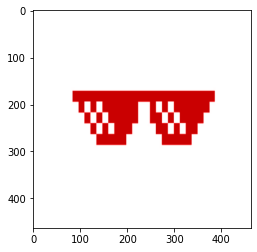

In [40]:
# cv2의 add 기능을 사용하여 빨간색 출력
img_dst = cv2.add(img_sticker_rgb, 200)
plt.imshow(img_dst)
plt.show

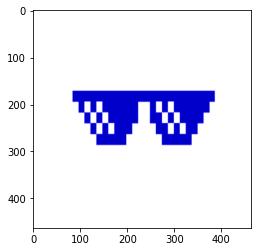

In [41]:
# 빨간색을 그대로 적용하면 파란색으로 됨 그렇기 color_bgr2rgb 기능을 사용하여 보정처리 진행.
img_dst = cv2.add(img_sticker_rgb, 200)
img_dst = cv2.cvtColor(img_dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_dst)
plt.show()

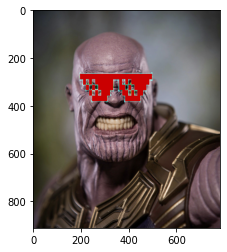

In [30]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_dst==255,sticker_area,img_dst).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


#### 여러 명이 있는 이미지에 적용하기

얼추 악당 이미지에 맞는 타노스가 완성.  
나머지 어벤저스 멤버들도 선글라스를 씌워 멋을 살리고자함.

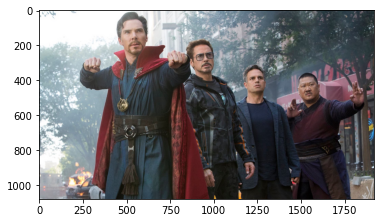

In [35]:
my_image_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/avengs.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # 이미지 색 보정처리
plt.imshow(img_rgb)
plt.show()

rectangles[[(1489, 402) (1596, 510)], [(459, 81) (614, 236)], [(1190, 355) (1298, 462)], [(884, 211) (1013, 340)]]


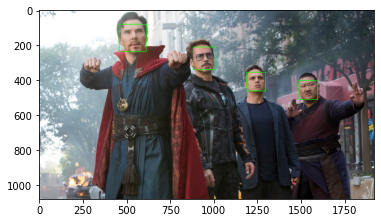

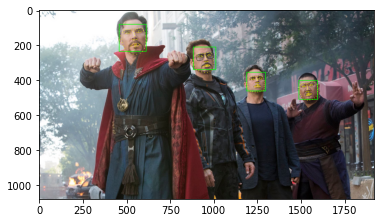

In [36]:
# 찾은 얼굴의 영역을 박스로 표시

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아내기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

선글라스를 쓰고 있는 아이언맨(왼쪽에서 두번째)도 잘 인식하고 있음

(130, 130, 3)


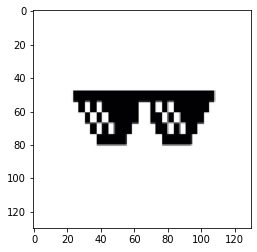

In [37]:
sticker_path = os.getenv('HOME')+'/Desktop/Code/LMS/E_08_cv2_dlib/sun_lmk.png'
img_sticker = cv2.imread(sticker_path)

w = h = dlib_rect.width()
img_sticker = cv2.resize(img_sticker, (w, h))

plt.imshow(img_sticker)
plt.show
print (img_sticker.shape)

여러명의 얼굴이기에 각각의 좌표에 맞춰 적용하기 위한 for문 사용.  
스티커의 위치가 부자연스러워 얼굴각도에 맞춰서 각도를 살짝 조절.


(1538, 440)
(544, 132)
(1249, 392)
(955, 265)


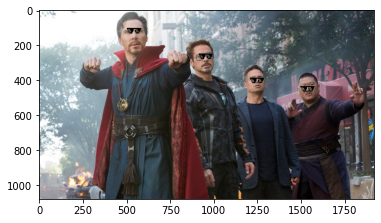

In [38]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[28]) 
    if landmark[28] == (248, 107):
        x = landmark[28][0]
        refined_x = x - w // 2
        y = landmark[28][1] - dlib_rect.height()//2 + 10
        refined_y = y
    elif landmark[28] == (462, 66):
        x = landmark[28][0]
        refined_x = x - w // 2
        y = landmark[28][1] - dlib_rect.height()//2 + 5
        refined_y = y
        
    else:
        x = landmark[28][0]
        refined_x = x - w // 2
        y = landmark[28][1] - dlib_rect.height()//2
        refined_y = y
    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

지구수호대가아닌 김건모와 자이언트st가 탄생.

### 루브릭.

|평가문항|비고|상세기준|비고|
|:---|:---:|:---|:---:|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.	||원본에 스티커 사진이 정상적으로 합성되었다.||
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	||정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다||
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.||얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.| |

---

### 회고록.

얼굴인식의 흐름을 이해해 dlib 라이브러리를 사용하여 이미지 배열의 인덱싱 예외처리를 통해 자신만의 카메라 스티커 앱을 만들어보는 8번째 Exploration이었다.  
비록 자동으로 좌표를 인식하고 생성해주는 landmark를 사용했지만 원하는대로 손쉽게 얼굴에 여러 스티커를 적용할 수 있다는 것이 신기하기도 했다.  
사람의 얼굴을 자동으로 인식하다보니 일반적인 얼굴은 너무 손쉽게 적용할 수 있어 기괴한 얼굴 형태를 갖춘 타노스를 이용해 프로젝트를 진행했는데 비록 좌표 값이 일부 벗어났고 그 값을 수정하는방법을 전부 찾지못했지만 각 landmark 좌표값을 이용해 최대한 적절한 위치에 스티커를 매칭시켜보았다.  
나중에는 정면을 바라보는 것이 아닌 이미지를 사용하고자 했지만 이 경우 스티커 자체를 변경해서 해야했기에 결과적으로 정면에 스티커와 적용하는 것과 큰차이가 없었기에 진행하지 않았다.  
그럼에도 dlib는 아예 다른형태 (ex뒷모습이거나 90도로 완전히 꺽인 사진, 너무 어두워서 빛의 밝기를 인식하지 못해 경계선을 인식하지 못하는 경우 등) 같은 경우가 아니면 대부분 적절한 landmark를 찾아낼정도로 성능이 좋은 라이브러리였다. 

이번 exp는 여태까지 진행한 exp중 코드나 분량자체는 가장 쉽고 재밌는편에 속했지만 정작 그 속에 담긴 원리나 개념은 파악하지 못해 아쉬웠다. 이 코드를 작성하는 대부분은 직접 실행해보면서 적절한 색깔이나 위치를 뽑아낼때까지 세부값을 수정하는 노가다가 점철되어 있었다.  
클론코딩이 아닌 원리나 개념을 정확하게 이해할 필요가 있음.

----

### Reference. (APA)

-----